In [1]:
import numpy, cv2, os, re, pandas
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")
src_img_location = "/content/gdrive/My Drive/kartrushplus/"

Mounted at /content/gdrive


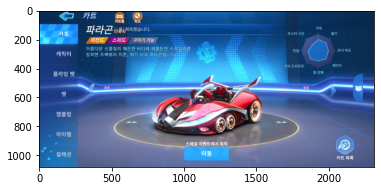

In [3]:
#FIXME
input_name = "파라곤"

src_image = cv2.imread(src_img_location + input_name + ".jpg", cv2.IMREAD_COLOR)
src_image = cv2.cvtColor(src_image, cv2.COLOR_BGR2RGB)

#Show imgage with matplitlib
plt.imshow(src_image)
plt.show()

In [4]:
src_image.shape

(1080, 2316, 3)

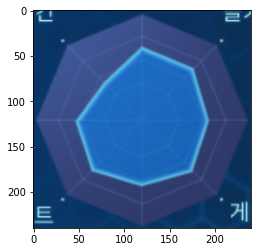

In [5]:
stat_roi = src_image[160:400, 1810:2050]
plt.imshow(stat_roi)
plt.show()

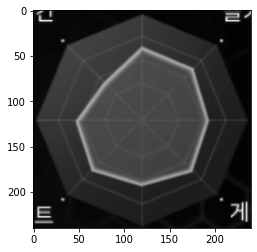

In [6]:
stat_roi_gray = cv2.cvtColor(stat_roi, cv2.COLOR_RGB2GRAY)
plt.imshow(stat_roi_gray, cmap="gray")
plt.show()

In [7]:
ret, thresh = cv2.threshold(stat_roi_gray, 127, 255, 0)
contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

max_idx = 0
max_area = 0

for i, contour in enumerate(contours):
  area = cv2.contourArea(contour)
  if area > max_area:
    max_area = area
    max_idx = 1

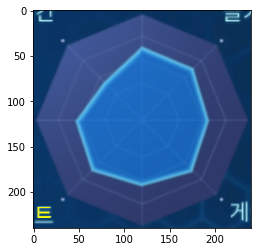

파라곤 's stat :  15466.5


In [8]:
cv2.drawContours(stat_roi, [contours[max_idx]], 0, (255, 255, 0), 1)

plt.imshow(stat_roi)
plt.show()

print(input_name, "'s stat : ", max_area)

In [16]:
def calculate_stat(input_img):
  src_image = cv2.imread(src_img_location + input_img + ".jpg", cv2.IMREAD_COLOR)
  src_image = cv2.cvtColor(src_image, cv2.COLOR_BGR2RGB)
  stat_roi = src_image[160:400, 1810:2050]
  stat_roi_gray = cv2.cvtColor(stat_roi, cv2.COLOR_RGB2GRAY)
  ret, thresh = cv2.threshold(stat_roi_gray, 127, 255, 0)
  contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  max_idx = 0
  max_area = 0
  for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if area > max_area:
      max_area = area
      max_idx = 1
  cv2.drawContours(stat_roi, [contours[max_idx]], 0, (255, 255, 0), 1)
  return stat_roi, max_area

In [17]:
kart_list = os.listdir(src_img_location)
kart_list = [re.sub('.jpg+', '', _) for _ in kart_list]
print(kart_list)

stat_dict = {}

for kart in kart_list:
  _, area = calculate_stat(kart)
  stat_dict[kart] = area


['슈퍼마라톤', '스위피', '사이버버스트', '타이칸4S', '윈드솔리드', '능력자다오', '제노', '연습카트', '클래식코튼', '파라곤']


In [18]:
df = pandas.DataFrame(list(stat_dict.items()), columns= ['이름', '스탯 총합'])
df = df.sort_values(by=['스탯 총합'], ascending = False)
pandas.set_option("display.max_rows", None, "display.max_columns", None)
from IPython.display import display, HTML

display(HTML(df.to_html()))


,이름,스탯 총합
9,파라곤,15466.5
0,슈퍼마라톤,11770.0
3,타이칸4S,10970.0
1,스위피,10835.5
2,사이버버스트,10524.5
4,윈드솔리드,10169.0
6,제노,9503.5
8,클래식코튼,8281.5
5,능력자다오,7976.0
7,연습카트,2543.5
